<a href="https://colab.research.google.com/github/dgebenicolas/Machine-Learning-Projects/blob/main/COMP551_A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1


Loading and cleaning hepatitis dataset

In [ ]:
import pandas as pd


hepatitis = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/hepatitis/hepatitis.data')
hepatitis.columns = ['CLASS', 'AGE', 'SEX', 'STEROID', 'ANTIVIRALS', 'FATIGUE', 'MALAISE', 'ANOREXIA', 'LIVER BIG', 'LIVER FARM', 'SPLEEN PALPABLE', 'SPIDERS', 'ASCITES', 
                     'VARICES', 'BILIRUBIN', 'ALK PHOSPHATE', 'SGOT', 'ALBUMIN', 'PROTIME', 'HISTOLOGY']
clean_hepatitis = hepatitis[~hepatitis.eq('?').any(1)]
clean_hepatitis.head()

,CLASS,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FARM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.90,95,28,4.0,75,1
9,2,39,1,1,1,2,2,2,1,1,2,2,2,2,1.30,78,30,4.4,85,1
10,2,32,1,2,1,1,2,2,2,1,2,1,2,2,1.00,59,249,3.7,54,1
11,2,41,1,2,1,1,2,2,2,1,2,2,2,2,0.90,81,60,3.9,52,1
12,2,30,1,2,2,1,2,2,2,1,2,2,2,2,2.20,57,144,4.9,78,1


Loading and cleaning Messidor dataset

In [ ]:
from scipy.io import arff
import urllib.request
from io import StringIO

dataset_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00329/messidor_features.arff'
response = urllib.request.urlopen(dataset_url)
dataset, meta = arff.loadarff(StringIO(response.read().decode()))
messidor = pd.DataFrame(dataset)

messidor.columns = ["QUALITY", "PRE-SCREENING", "MA-2", "MA-3", "MA-4", "MA-5", "MA-6", "MA-7",
         "EXUDATES-8", "EXUDATES-9", "EXUDATES-10", "EXUDATES-11", "EXUDATES-12",
         "EXUDATES-13", "EXUDATES-14", "EXUDATES-15", "EUCLIDEAN DISTANCE", "DIAMETER OF OPTIC DISC",
         "AM/FM", "CLASS"]
for c in messidor.columns:
    #Modifying data (Object -> int)
    if messidor[c].dtype == 'object':
        messidor[c] = messidor[c].str.decode('UTF-8').astype('int')

#Getting rid of rows with missing data
clean_messidor = messidor[~messidor.eq('?').any(1)]

clean_messidor.head()

,QUALITY,PRE-SCREENING,MA-2,MA-3,MA-4,MA-5,MA-6,MA-7,EXUDATES-8,EXUDATES-9,EXUDATES-10,EXUDATES-11,EXUDATES-12,EXUDATES-13,EXUDATES-14,EXUDATES-15,EUCLIDEAN DISTANCE,DIAMETER OF OPTIC DISC,AM/FM,CLASS
0,1.0,1.0,22.0,22.0,22.0,19.0,18.0,14.0,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1.0,0
1,1.0,1.0,24.0,24.0,22.0,18.0,16.0,13.0,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0.0,0
2,1.0,1.0,62.0,60.0,59.0,54.0,47.0,33.0,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0.0,1
3,1.0,1.0,55.0,53.0,53.0,50.0,43.0,31.0,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0.0,0
4,1.0,1.0,44.0,44.0,44.0,41.0,39.0,27.0,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0.0,1


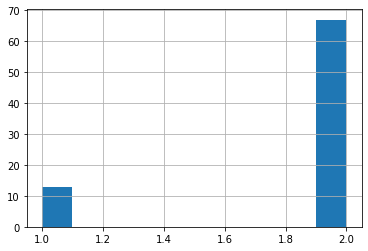

In [ ]:
clean_hepatitis["CLASS"].hist()

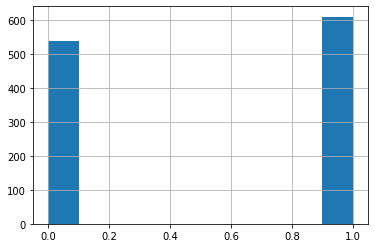

In [ ]:
clean_messidor["CLASS"].hist()

Class Distribution: 2 = Live and 1 = Die

In [ ]:
clean_hepatitis['CLASS'].value_counts()

2    67
1    13
Name: CLASS, dtype: int64

Class distribution for Messidor: 1 = contains signs of DR  0 = no signs of DR.

In [ ]:
clean_messidor['CLASS'].value_counts()

1    611
0    540
Name: CLASS, dtype: int64

Plot of age distribution for dead or alive

CLASS
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
Name: AGE, dtype: object

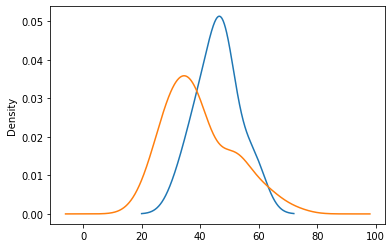

In [ ]:
clean_hepatitis.groupby('CLASS').AGE.plot(kind='kde')

In [ ]:
df = clean_messidor.rename(columns={'EUCLIDEAN DISTANCE':'euclidean_distance','MA-2':'MA_2','MA-4':'MA_4','EXUDATES-8':'EXUDATES_8','DIAMETER OF OPTIC DISC':'DIAMETER'})

Plot of Euclidean distance distibution for patients with DR and no DR

CLASS
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: euclidean_distance, dtype: object

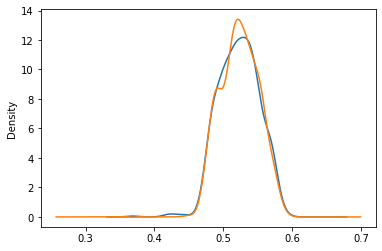

In [ ]:
df.groupby('CLASS').euclidean_distance.plot(kind='kde')

 Plot of MA-2 distibution for patients with DR and no DR

CLASS
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: MA_2, dtype: object

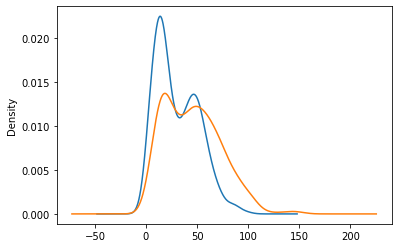

In [ ]:
df.groupby('CLASS').MA_2.plot(kind='kde')

Plot of MA-4 distibution for patients with DR and no DR

CLASS
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: MA_4, dtype: object

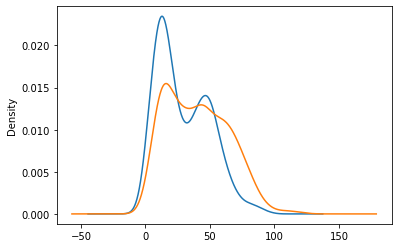

In [ ]:
df.groupby('CLASS').MA_4.plot(kind='kde')

Plot of EXUDATES-8 distibution for patients with DR and no DR

CLASS
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: EXUDATES_8, dtype: object

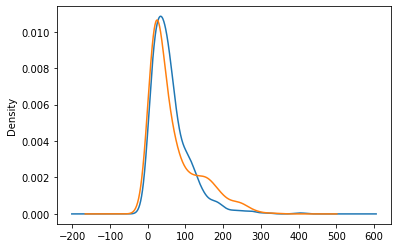

In [ ]:
df.groupby('CLASS').EXUDATES_8.plot(kind='kde')

CLASS
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: DIAMETER, dtype: object

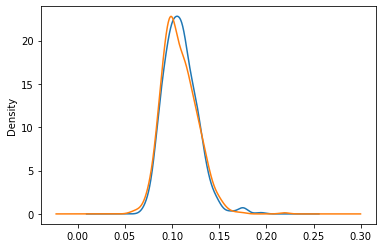

In [ ]:
df.groupby('CLASS').DIAMETER.plot(kind='kde')

Basic Statistics for hepatitis dataset

In [ ]:
clean_hepatitis.describe()

,CLASS,AGE,SEX,ANTIVIRALS,HISTOLOGY
count,80.000000,80.00000,80.000000,80.000000,80.00000
mean,1.837500,40.66250,1.137500,1.737500,1.41250
std,0.371236,11.28003,0.346547,0.442769,0.49539
min,1.000000,20.00000,1.000000,1.000000,1.00000
25%,2.000000,32.00000,1.000000,1.000000,1.00000
50%,2.000000,38.50000,1.000000,2.000000,1.00000
75%,2.000000,49.25000,1.000000,2.000000,2.00000
max,2.000000,72.00000,2.000000,2.000000,2.00000


Basic statistics for messidor dataset

In [ ]:
clean_messidor.describe()

,QUALITY,PRE-SCREENING,MA-2,MA-3,MA-4,MA-5,MA-6,MA-7,EXUDATES-8,EXUDATES-9,EXUDATES-10,EXUDATES-11,EXUDATES-12,EXUDATES-13,EXUDATES-14,EXUDATES-15,EUCLIDEAN DISTANCE,DIAMETER OF OPTIC DISC,AM/FM,CLASS
count,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000
mean,0.996525,0.918332,38.428323,36.909644,35.140747,32.297133,28.747176,21.151173,64.096674,23.088012,8.704610,1.836489,0.560738,0.212290,0.085674,0.037225,0.523212,0.108431,0.336229,0.530843
std,0.058874,0.273977,25.620913,24.105612,22.805400,21.114767,19.509227,15.101560,58.485289,21.602696,11.567589,3.923224,2.484111,1.057126,0.398717,0.178959,0.028055,0.017945,0.472624,0.499265
min,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.349274,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.367762,0.057906,0.000000,0.000000
25%,1.000000,1.000000,16.000000,16.000000,15.000000,14.000000,11.000000,8.000000,22.271597,7.939315,1.249050,0.081554,0.000000,0.000000,0.000000,0.000000,0.502855,0.095799,0.000000,0.000000
50%,1.000000,1.000000,35.000000,35.000000,32.000000,29.000000,25.000000,18.000000,44.249119,17.038020,4.423472,0.484829,0.022248,0.001554,0.000000,0.000000,0.523308,0.106623,0.000000,1.000000
75%,1.000000,1.000000,55.000000,53.000000,51.000000,48.000000,43.000000,32.000000,87.804112,31.305692,11.766880,1.921648,0.191953,0.038450,0.004832,0.003851,0.543670,0.119591,1.000000,1.000000
max,1.000000,1.000000,151.000000,132.000000,120.000000,105.000000,97.000000,89.000000,403.939108,167.131427,106.070092,59.766121,51.423208,20.098605,5.937799,3.086753,0.592217,0.219199,1.000000,1.000000


Split Hepatitis Dataset into training and testing sets

In [ ]:
import numpy as np
np.random.seed(7543)
#Ensure all input values are numbers (e.g. not strings)
numberize = np.vectorize(lambda x: float(x))

x_hep, y_hep = clean_hepatitis.iloc[:, 1:], clean_hepatitis.iloc[:,0]

x_hep_np = numberize(x_hep.to_numpy())
y_hep_np = y_hep.to_numpy()

inds_hep = np.random.permutation(x_hep_np.shape[0])

x_hep_train, y_hep_train = x_hep_np[inds_hep[:53]], np.ndarray.flatten(y_hep_np[inds_hep[:53]])
x_hep_test, y_hep_test = x_hep_np[inds_hep[53:]], np.ndarray.flatten(y_hep_np[inds_hep[53:]])

Split Messidor dataset into training and testing sets

In [ ]:
x_mes, y_mes = clean_messidor.iloc[:, :-1], clean_messidor.iloc[:,-1]

x_mes_np = numberize(x_mes.to_numpy())
y_mes_np = y_mes.to_numpy()

inds_mes = np.random.permutation(x_mes_np.shape[0])   

x_mes_train, y_mes_train = x_mes_np[inds_mes[:767]], np.ndarray.flatten(y_mes_np[inds_mes[:767]])
x_mes_test, y_mes_test = x_mes_np[inds_mes[767:]], np.ndarray.flatten(y_mes_np[inds_mes[767:]])

# Task 2

Implement KNN

In [ ]:
euclidean = lambda x1, x2: np.sqrt(np.sum((x1 - x2)**2, axis=-1))
manhattan = lambda x1, x2: np.sum(np.abs(x1 - x2), axis=-1)

class KNN:

    def __init__(self, K=1, dist_fn= euclidean):
        self.dist_fn = dist_fn
        self.K = K
        return
    
    #Training data on training dataset
    def fit(self, x, y):
        self.x = x
        self.y = y
        self.C = 3
        return self


    #Prediction based on test dataset
    def predict(self, x_test):
        num_test = x_test.shape[0]
        distances = self.dist_fn(self.x[None,:,:], x_test[:,None,:])
        knns = np.zeros((num_test, self.K), dtype=int)
        y_prob = np.zeros((num_test, self.C))
        for i in range(num_test):
            knns[i,:] = np.argsort(distances[i])[:self.K]
            y_prob[i,:] = np.bincount(self.y[knns[i,:]], minlength=self.C)
        y_prob /= self.K
        return y_prob, knns



In [ ]:
def evaluate_acc(y_pred, y_test):
  return np.sum(y_pred == y_test)/y_test.shape[0]

Node class for the decision tree: \\
Note: copied this from his colab

In [ ]:
class Node: 
  def __init__(self, data_indices, parent):
    self.left = None
    self.right = None
    self.split_feature = None
    self.split_value = None
    self.data_indices = data_indices

    if parent:
      self.depth = parent.depth + 1
      self.num_classes = parent.num_classes
      self.data = parent.data
      self.labels = parent.labels
      class_prob = np.bincount(self.labels[data_indices], minlength=np.max(self.labels) + 1)
      self.class_prob = class_prob / np.sum(class_prob)

      #copied this from his colab. 

  def is_leaf(self):
    return all([self.left, self.right])


Cost functions: Gini, misclassification, entropy \\
also pretty much copied from his colab, though there isn't much to change

In [ ]:
def entropy_cost(labels):
  class_probs = np.bincount(labels) / len(labels) #find the probabilities of all the classes
  class_probs = class_probs[class_probs > 0]    
  return -np.sum(class_probs * np.log2(class_probs))

def gini_index_cost(labels):
  class_probs = np.bincount(labels) / len(labels)
  return 1 - np.sum(np.square(class_probs))

def misclassification_cost(labels):
  count = np.bincount(labels)
  class_probs = count / np.sum(count)
  return 1 - np.max(class_probs)


Greedy Heuristic

In [ ]:
def greedy_node(node, cost_function):
  min_cost = np.inf
  best_feature = None
  best_thresh = None

  num_features = np.shape(node.data)[1]

  for feature in range(num_features):
    #get and use features as set of possible thresholds
    thresholds = node.data[:,feature]

    for threshold in thresholds:
      #perform split
      data = node.data[node.data_indices, feature]

      left_index = node.data_indices[data <= threshold]
      right_index = node.data_indices[data > threshold]

      #if all the data is in one side, there is no point adding another leaf node.
      if(left_index.size == 0 or right_index.size == 0):
        continue

      #otherwise, calculate cost
      cost_l = cost_function(node.labels[left_index])
      cost_r = cost_function(node.labels[right_index])

      num_l = left_index.size
      num_r = right_index.size

      cost = (num_l * cost_l + num_r * cost_r) / (np.shape(node.data)[0])

      #update cost, feature and threshold if necessary
      if cost < min_cost:
        min_cost = cost
        best_feature = feature
        best_thresh = threshold
  
  return min_cost, best_feature, best_thresh

    


Implement DT:

# Task 3

## Test Accuracy of DT


#### Compare different cost functions
Misclassification cost

In [ ]:

#num_classes, max_depth = 3, min_leaf_instances = 1, cost_function=misclassification_cost
model_hep = DT(3, cost_function=misclassification_cost)
hep_probs_test = model_hep.fit(x_hep_train, y_hep_train).predict(x_hep_test)
hep_y_pred = np.argmax(hep_probs_test, 1)
hep_acc = np.sum(hep_y_pred == y_hep_test)/y_hep_test.shape[0]

model_mes = DT(3)
mes_probs_test = model_mes.fit(x_mes_train, y_mes_train).predict(x_mes_test)
mes_y_pred = np.argmax(mes_probs_test, 1)
mes_acc = np.sum(mes_y_pred == y_mes_test)/y_mes_test.shape[0]

print(f"The test accuracy of KNN on Hepatitis Dataset: {hep_acc}")
print(f"The test accuracy of KNN on Messidor Dataset: {mes_acc}")


The test accuracy of KNN on Hepatitis Dataset: 0.8518518518518519
The test accuracy of KNN on Messidor Dataset: 0.6432291666666666


Gini

In [ ]:
model_hep = DT(3, cost_function=gini_index_cost)
hep_probs_test = model_hep.fit(x_hep_train, y_hep_train).predict(x_hep_test)
hep_y_pred = np.argmax(hep_probs_test, 1)
hep_acc = np.sum(hep_y_pred == y_hep_test)/y_hep_test.shape[0]

model_mes = DT(3, cost_function=gini_index_cost)
mes_probs_test = model_mes.fit(x_mes_train, y_mes_train).predict(x_mes_test)
mes_y_pred = np.argmax(mes_probs_test, 1)
mes_acc = np.sum(mes_y_pred == y_mes_test)/y_mes_test.shape[0]

print(f"The test accuracy of KNN on Hepatitis Dataset: {hep_acc}")
print(f"The test accuracy of KNN on Messidor Dataset: {mes_acc}")


The test accuracy of KNN on Hepatitis Dataset: 0.8518518518518519
The test accuracy of KNN on Messidor Dataset: 0.640625


Entropy

In [ ]:
model_hep = DT(3, cost_function=entropy_cost)
hep_probs_test = model_hep.fit(x_hep_train, y_hep_train).predict(x_hep_test)
hep_y_pred = np.argmax(hep_probs_test, 1)
hep_acc = np.sum(hep_y_pred == y_hep_test)/y_hep_test.shape[0]

model_mes = DT(3, cost_function=entropy_cost)
mes_probs_test = model_mes.fit(x_mes_train, y_mes_train).predict(x_mes_test)
mes_y_pred = np.argmax(mes_probs_test, 1)
mes_acc = np.sum(mes_y_pred == y_mes_test)/y_mes_test.shape[0]

print(f"The test accuracy of KNN on Hepatitis Dataset: {hep_acc}")
print(f"The test accuracy of KNN on Messidor Dataset: {mes_acc}")

The test accuracy of KNN on Hepatitis Dataset: 0.8518518518518519
The test accuracy of KNN on Messidor Dataset: 0.6328125


Choosing best Tree Depth for DT


Using Gini Index to find best depth for hep

best depth = 3, test accuracy = 0.8518518518518519


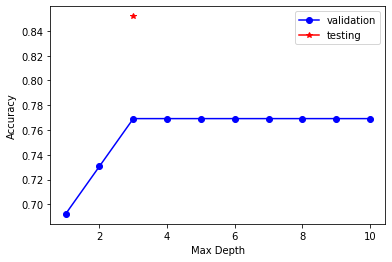

In [ ]:
%matplotlib inline                                  
import matplotlib.pyplot as plt

x_hep_train_tr, y_hep_train_tr = x_hep_train[:27], y_hep_train[:27]
x_hep_train_va, y_hep_train_va = x_hep_train[27:], y_hep_train[27:]

model_choices=[]
valid_acc = []

for depth in range(1, 11):
  hep_va_model = DT(depth, cost_function=gini_index_cost)
  
  y_hep_train_va_prob = hep_va_model.fit(x_hep_train_tr, y_hep_train_tr).predict(x_hep_train_va)

  y_hep_train_va_pred = np.argmax(y_hep_train_va_prob, 1)
  acc = np.sum(y_hep_train_va_pred == y_hep_train_va)/y_hep_train_va.shape[0]
  model_choices.append(depth)
  valid_acc.append(acc)

best_hep_depth = model_choices[valid_acc.index(max(valid_acc))]
hep_va_model = DT(max_depth = best_hep_depth)
y_hep_test_prob = hep_va_model.fit(x_hep_train, y_hep_train).predict(x_hep_test)
y_hep_test_pred = np.argmax(y_hep_test_prob, 1)
test_acc = np.sum(y_hep_test_pred == y_hep_test)/y_hep_test.shape[0]
print(f'best depth = {best_hep_depth}, test accuracy = {test_acc}')

plt.plot(model_choices, valid_acc, marker='o', color='blue', label='validation')
plt.plot(best_hep_depth, test_acc, marker='*', color='red', label='testing')
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.legend(loc='best')

Use Misclassification Cost to find best depth on hep set


best depth = 1, test accuracy = 0.8148148148148148


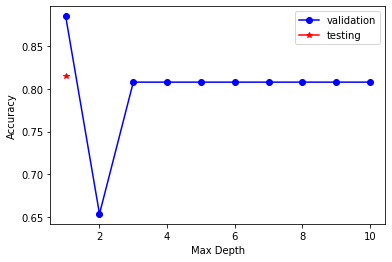

In [ ]:
x_hep_train_tr, y_hep_train_tr = x_hep_train[:27], y_hep_train[:27]
x_hep_train_va, y_hep_train_va = x_hep_train[27:], y_hep_train[27:]

model_choices=[]
valid_acc = []

for depth in range(1, 11):
  hep_va_model = DT(depth, cost_function=misclassification_cost)
  
  y_hep_train_va_prob = hep_va_model.fit(x_hep_train_tr, y_hep_train_tr).predict(x_hep_train_va)

  y_hep_train_va_pred = np.argmax(y_hep_train_va_prob, 1)
  acc = np.sum(y_hep_train_va_pred == y_hep_train_va)/y_hep_train_va.shape[0]
  model_choices.append(depth)
  valid_acc.append(acc)

best_hep_depth = model_choices[valid_acc.index(max(valid_acc))]
hep_va_model = DT(max_depth = best_hep_depth)
y_hep_test_prob = hep_va_model.fit(x_hep_train, y_hep_train).predict(x_hep_test)
y_hep_test_pred = np.argmax(y_hep_test_prob, 1)
test_acc = np.sum(y_hep_test_pred == y_hep_test)/y_hep_test.shape[0]
print(f'best depth = {best_hep_depth}, test accuracy = {test_acc}')

plt.plot(model_choices, valid_acc, marker='o', color='blue', label='validation')
plt.plot(best_hep_depth, test_acc, marker='*', color='red', label='testing')
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.legend(loc='best')

Use Entropy cost to find best depth on hep set

best depth = 3, test accuracy = 0.8518518518518519


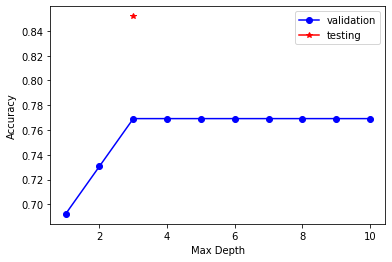

In [ ]:
x_hep_train_tr, y_hep_train_tr = x_hep_train[:27], y_hep_train[:27]
x_hep_train_va, y_hep_train_va = x_hep_train[27:], y_hep_train[27:]

model_choices=[]
valid_acc = []

for depth in range(1, 11):
  hep_va_model = DT(depth, cost_function=entropy_cost)
  
  y_hep_train_va_prob = hep_va_model.fit(x_hep_train_tr, y_hep_train_tr).predict(x_hep_train_va)

  y_hep_train_va_pred = np.argmax(y_hep_train_va_prob, 1)
  acc = np.sum(y_hep_train_va_pred == y_hep_train_va)/y_hep_train_va.shape[0]
  model_choices.append(depth)
  valid_acc.append(acc)

best_hep_depth = model_choices[valid_acc.index(max(valid_acc))]
hep_va_model = DT(max_depth = best_hep_depth)
y_hep_test_prob = hep_va_model.fit(x_hep_train, y_hep_train).predict(x_hep_test)
y_hep_test_pred = np.argmax(y_hep_test_prob, 1)
test_acc = np.sum(y_hep_test_pred == y_hep_test)/y_hep_test.shape[0]
print(f'best depth = {best_hep_depth}, test accuracy = {test_acc}')

plt.plot(model_choices, valid_acc, marker='o', color='blue', label='validation')
plt.plot(best_hep_depth, test_acc, marker='*', color='red', label='testing')
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.legend(loc='best')

Use Gini Index to find best depth for Messidor set

best depth = 4, test accuracy = 0.6484375


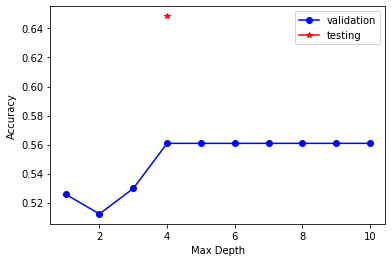

In [ ]:
x_mes_train_tr, y_mes_train_tr = x_mes_train[:27], y_mes_train[:27]
x_mes_train_va, y_mes_train_va = x_mes_train[27:], y_mes_train[27:]

model_choices=[]
valid_acc = []

for depth in range(1, 11):
  mes_va_model = DT(depth, cost_function=gini_index_cost)
  
  y_mes_train_va_prob = mes_va_model.fit(x_mes_train_tr, y_mes_train_tr).predict(x_mes_train_va)

  y_mes_train_va_pred = np.argmax(y_mes_train_va_prob, 1)
  acc = np.sum(y_mes_train_va_pred == y_mes_train_va)/y_mes_train_va.shape[0]
  model_choices.append(depth)
  valid_acc.append(acc)

best_mes_depth = model_choices[valid_acc.index(max(valid_acc))]
mes_va_model = DT(max_depth = best_mes_depth)
y_mes_test_prob = mes_va_model.fit(x_mes_train, y_mes_train).predict(x_mes_test)
y_mes_test_pred = np.argmax(y_mes_test_prob, 1)
test_acc = np.sum(y_mes_test_pred == y_mes_test)/y_mes_test.shape[0]
print(f'best depth = {best_mes_depth}, test accuracy = {test_acc}')

plt.plot(model_choices, valid_acc, marker='o', color='blue', label='validation')
plt.plot(best_mes_depth, test_acc, marker='*', color='red', label='testing')
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.legend(loc='best')

Messidor depth test with misclassification cost

best depth = 1, test accuracy = 0.5989583333333334


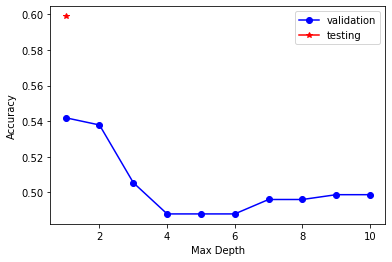

In [ ]:
x_mes_train_tr, y_mes_train_tr = x_mes_train[:27], y_mes_train[:27]
x_mes_train_va, y_mes_train_va = x_mes_train[27:], y_mes_train[27:]

model_choices=[]
valid_acc = []

for depth in range(1, 11):
  mes_va_model = DT(depth, cost_function=misclassification_cost)
  
  y_mes_train_va_prob = mes_va_model.fit(x_mes_train_tr, y_mes_train_tr).predict(x_mes_train_va)

  y_mes_train_va_pred = np.argmax(y_mes_train_va_prob, 1)
  acc = np.sum(y_mes_train_va_pred == y_mes_train_va)/y_mes_train_va.shape[0]
  model_choices.append(depth)
  valid_acc.append(acc)

best_mes_depth = model_choices[valid_acc.index(max(valid_acc))]
mes_va_model = DT(max_depth = best_mes_depth)
y_mes_test_prob = mes_va_model.fit(x_mes_train, y_mes_train).predict(x_mes_test)
y_mes_test_pred = np.argmax(y_mes_test_prob, 1)
test_acc = np.sum(y_mes_test_pred == y_mes_test)/y_mes_test.shape[0]
print(f'best depth = {best_mes_depth}, test accuracy = {test_acc}')

plt.plot(model_choices, valid_acc, marker='o', color='blue', label='validation')
plt.plot(best_mes_depth, test_acc, marker='*', color='red', label='testing')
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.legend(loc='best')

Max depth using entropy

best depth = 4, test accuracy = 0.6484375


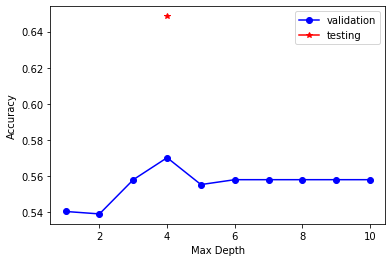

In [ ]:
x_mes_train_tr, y_mes_train_tr = x_mes_train[:27], y_mes_train[:27]
x_mes_train_va, y_mes_train_va = x_mes_train[27:], y_mes_train[27:]

model_choices=[]
valid_acc = []

for depth in range(1, 11):
  mes_va_model = DT(depth, cost_function=entropy_cost)
  
  y_mes_train_va_prob = mes_va_model.fit(x_mes_train_tr, y_mes_train_tr).predict(x_mes_train_va)

  y_mes_train_va_pred = np.argmax(y_mes_train_va_prob, 1)
  acc = np.sum(y_mes_train_va_pred == y_mes_train_va)/y_mes_train_va.shape[0]
  model_choices.append(depth)
  valid_acc.append(acc)

best_mes_depth = model_choices[valid_acc.index(max(valid_acc))]
mes_va_model = DT(max_depth = best_mes_depth)
y_mes_test_prob = mes_va_model.fit(x_mes_train, y_mes_train).predict(x_mes_test)
y_mes_test_pred = np.argmax(y_mes_test_prob, 1)
test_acc = np.sum(y_mes_test_pred == y_mes_test)/y_mes_test.shape[0]
print(f'best depth = {best_mes_depth}, test accuracy = {test_acc}')

plt.plot(model_choices, valid_acc, marker='o', color='blue', label='validation')
plt.plot(best_mes_depth, test_acc, marker='*', color='red', label='testing')
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.legend(loc='best')

### Test Accuracy of KNN 

Comparing test accuracy of Hepatitis vs. Messidor Set


In [ ]:

model = KNN(1)
y_hep_prob, hep_knns =  model.fit(x_hep_train, y_hep_train).predict(x_hep_test)
y_hep_pred = np.argmax(y_hep_prob, axis=-1)
hep_acc = np.sum(y_hep_pred == y_hep_test)/y_hep_test.shape[0]

y_mes_prob, mes_knns =  model.fit(x_mes_train, y_mes_train).predict(x_mes_test)
y_mes_pred = np.argmax(y_mes_prob, axis=-1)
mes_acc = np.sum(y_mes_pred == y_mes_test)/y_mes_test.shape[0]

print(f"The test accuracy of KNN on Hepatitis Dataset: {hep_acc}")
print(f"The test accuracy of KNN on Messidor Dataset: {mes_acc}")


The test accuracy of KNN on Hepatitis Dataset: 0.8148148148148148
The test accuracy of KNN on Messidor Dataset: 0.6328125


Manhattan Distance Comparison

In [ ]:
manhattan_model = KNN(1, manhattan)
y_hep_prob, hep_knns =  manhattan_model.fit(x_hep_train, y_hep_train).predict(x_hep_test)
y_hep_pred = np.argmax(y_hep_prob, axis=-1)
hep_acc = np.sum(y_hep_pred == y_hep_test)/y_hep_test.shape[0]

y_mes_prob, mes_knns =  manhattan_model.fit(x_mes_train, y_mes_train).predict(x_mes_test)
y_mes_pred = np.argmax(y_mes_prob, axis=-1)
mes_acc = np.sum(y_mes_pred == y_mes_test)/y_mes_test.shape[0]

print(f"The test accuracy of KNN on Hepatitis Dataset: {hep_acc}")
print(f"The test accuracy of KNN on Messidor Dataset: {mes_acc}")

The test accuracy of KNN on Hepatitis Dataset: 0.7777777777777778
The test accuracy of KNN on Messidor Dataset: 0.6223958333333334


Choosing best K for hepatitis 

best K = 7, test accuracy = 0.8888888888888888


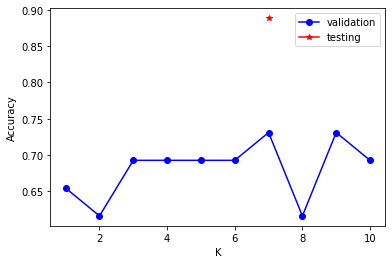

In [ ]:
%matplotlib inline                                  
import matplotlib.pyplot as plt

x_hep_train_tr, y_hep_train_tr = x_hep_train[:27], y_hep_train[:27]
x_hep_train_va, y_hep_train_va = x_hep_train[27:], y_hep_train[27:]

model_choices=[]
valid_acc = []


for k in range(1, 11):
  hep_va_model = KNN(k)
  y_hep_train_va_prob,_ = hep_va_model.fit(x_hep_train_tr, y_hep_train_tr).predict(x_hep_train_va)
  y_hep_train_va_pred = np.argmax(y_hep_train_va_prob, axis=-1)
  acc = np.sum(y_hep_train_va_pred == y_hep_train_va)/y_hep_train_va.shape[0]
  model_choices.append(k)
  valid_acc.append(acc)

best_hep_k = model_choices[valid_acc.index(max(valid_acc))]
hep_va_model = KNN(best_hep_k)
y_hep_test_prob,_ = hep_va_model.fit(x_hep_train, y_hep_train).predict(x_hep_test)
y_hep_test_pred = np.argmax(y_hep_test_prob, axis=-1)
test_acc = np.sum(y_hep_test_pred == y_hep_test)/y_hep_test.shape[0]
print(f'best K = {best_hep_k}, test accuracy = {test_acc}')

plt.plot(model_choices, valid_acc, marker='o', color='blue', label='validation')
plt.plot(best_hep_k, test_acc, marker='*', color='red', label='testing')
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend(loc='best')

Choosing best K for hepatitis 

best K = 7, test accuracy = 0.640625


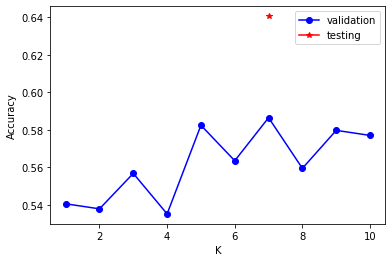

In [ ]:
x_mes_train_tr, y_mes_train_tr = x_mes_train[:27], y_mes_train[:27]
x_mes_train_va, y_mes_train_va = x_mes_train[27:], y_mes_train[27:]

model_choices=[]
valid_acc = []


for k in range(1, 11):
  mes_va_model = KNN(k)
  y_mes_train_va_prob,_ = mes_va_model.fit(x_mes_train_tr, y_mes_train_tr).predict(x_mes_train_va)
  y_mes_train_va_pred = np.argmax(y_mes_train_va_prob, axis=-1)
  acc = np.sum(y_mes_train_va_pred == y_mes_train_va)/y_mes_train_va.shape[0]
  model_choices.append(k)
  valid_acc.append(acc)

best_mes_K = model_choices[valid_acc.index(max(valid_acc))]
mes_va_model = KNN(best_mes_K)
y_mes_test_prob,_ = mes_va_model.fit(x_mes_train, y_mes_train).predict(x_mes_test)
y_mes_test_pred = np.argmax(y_mes_test_prob, axis=-1)
test_acc = np.sum(y_mes_test_pred == y_mes_test)/y_mes_test.shape[0]
print(f'best K = {best_mes_K}, test accuracy = {test_acc}')

plt.plot(model_choices, valid_acc, marker='o', color='blue', label='validation')
plt.plot(best_mes_K, test_acc, marker='*', color='red', label='testing')
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend(loc='best')

### TODO:
####- Permutation Feature Importance
####- Decision Boundary Plot 
####- Standardize Features/Weighted KNN etc.

Decision Boundary Plot for KNN

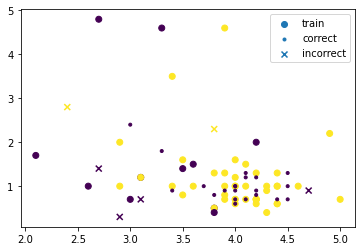

In [ ]:
correct = y_hep_test == y_hep_pred
incorrect = np.logical_not(correct)

plt.scatter(x_hep_train[:,16], x_hep_train[:,13], c=y_hep_train, marker='o', label='train')
plt.scatter(x_hep_test[correct,16], x_hep_test[correct,13], c=y_hep_pred[correct], marker='.', label='correct')
plt.scatter(x_hep_test[incorrect,16], x_hep_test[incorrect,13], c=y_hep_pred[incorrect], marker='x', label='incorrect')
plt.legend()
# ax = plt.gca()
# for label in ax.get_yaxis().get_ticklabels()[::1]:
#     label.set_visible(False)
plt.show()

STUFF TO ADD TO FINAL

finding best min_leaf instances using entropy index

In [ ]:
class DT:
  def __init__(self, max_depth, min_leaf_instances = 1, cost_function=misclassification_cost, min_cost_decrease = 0):
    self.num_classes = None
    self.max_depth = max_depth
    self.min_cost_decrease = min_cost_decrease
    self.min_leaf_instances = min_leaf_instances
    self.root = None
    self.cost_function = cost_function
    self.num_leafs = 1


  def fit(self, data, labels):
    #instantiate root
    self.data = data
    self.labels = labels

    self.num_classes = np.max(labels) + 1

    self.root = Node(np.arange(data.shape[0]), None)
    self.root.depth = 0
    self.root.data = data
    self.root.labels = labels
    self.root.num_classes = self.num_classes

    self._fit_tree(self.root)
    return self

    

  def predict(self, data):
    results = None
    for i in range(data.shape[0]):
      x = data[i]

      cur_node = self.root;

      while cur_node.left:
        if x[cur_node.split_feature] <= cur_node.split_value:
          cur_node = cur_node.left
        else:
          cur_node = cur_node.right
      
      if results is None:
        results = cur_node.class_prob
      else:
        results = np.vstack((results, cur_node.class_prob))

    #loop ends when a leaf is reached
    #return prob_class of leaf
    return results

  def _fit_tree(self, node):
    self.prev_cost = np.inf
    #base case
    #print(f"type of node: {type(node.depth)}")
    #print(f"type of dept: {type(self.max_depth)}")
    if node.depth >= self.max_depth or node.data_indices.size <= self.min_leaf_instances:
        #print(f"node depth is {node.depth}")
        #print(f"node indices is {node.data_indices.size}")
        #print(f"node_depth = self.max_depth {node.depth >= self.max_depth}")
        #print(f"node.data_indices.size <= self.min_leaf_instances {node.data_indices.size <= self.min_leaf_instances}")
        return

    #greedy split
    cost, feat, thresh = greedy_node(node, self.cost_function)

    #check if split can be done, if cost = inf then no split possible so return
    if(np.isinf(cost)):
      return

    #assign feature and threshold
    node.split_feature = feat
    node.split_value = thresh

    test_logicals = node.data[node.data_indices, feat] <= thresh

    left_child = Node(node.data_indices[test_logicals], node)
    right_child = Node(node.data_indices[np.logical_not(test_logicals)], node)

    self._fit_tree(left_child)
    self._fit_tree(right_child)

    node.left = left_child
    node.right = right_child

best minimum instances = 1, test accuracy = 0.6328125


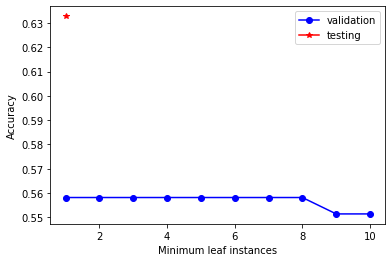

In [ ]:
x_mes_train_tr, y_mes_train_tr = x_mes_train[:27], y_mes_train[:27]
x_mes_train_va, y_mes_train_va = x_mes_train[27:], y_mes_train[27:]

model_choices=[]
valid_acc = []

for min_instances in range(1, 11):
  mes_va_model = DT(max_depth=3,min_leaf_instances=min_instances, cost_function=entropy_cost)
  
  y_mes_train_va_prob = mes_va_model.fit(x_mes_train_tr, y_mes_train_tr).predict(x_mes_train_va)

  y_mes_train_va_pred = np.argmax(y_mes_train_va_prob, 1)
  acc = np.sum(y_mes_train_va_pred == y_mes_train_va)/y_mes_train_va.shape[0]
  model_choices.append(min_instances)
  valid_acc.append(acc)

best_mes_instances = model_choices[valid_acc.index(max(valid_acc))]
mes_va_model = DT(max_depth = 3, min_leaf_instances = best_mes_instances, cost_function=entropy_cost)
y_mes_test_prob = mes_va_model.fit(x_mes_train, y_mes_train).predict(x_mes_test)
y_mes_test_pred = np.argmax(y_mes_test_prob, 1)
test_acc = np.sum(y_mes_test_pred == y_mes_test)/y_mes_test.shape[0]
print(f'best minimum instances = {best_mes_instances}, test accuracy = {test_acc}')

plt.plot(model_choices, valid_acc, marker='o', color='blue', label='validation')
plt.plot(best_mes_instances


, test_acc, marker='*', color='red', label='testing')
plt.xlabel("Minimum leaf instances")
plt.ylabel("Accuracy")
plt.legend(loc='best')



best leaf instances = 1, test accuracy = 0.8518518518518519


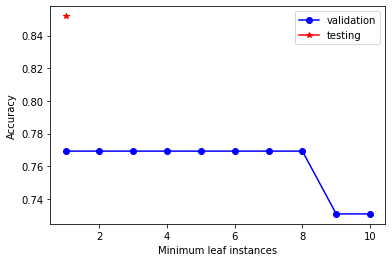

In [ ]:
x_hep_train_tr, y_hep_train_tr = x_hep_train[:27], y_hep_train[:27]
x_hep_train_va, y_hep_train_va = x_hep_train[27:], y_hep_train[27:]

model_choices=[]
valid_acc = []

for min_instances in range(1, 11):
  hep_va_model = DT(max_depth = 3, min_leaf_instances = min_instances, cost_function=gini_index_cost)
  
  y_hep_train_va_prob = hep_va_model.fit(x_hep_train_tr, y_hep_train_tr).predict(x_hep_train_va)

  y_hep_train_va_pred = np.argmax(y_hep_train_va_prob, 1)
  acc = np.sum(y_hep_train_va_pred == y_hep_train_va)/y_hep_train_va.shape[0]
  model_choices.append(min_instances)
  valid_acc.append(acc)

best_min_instances = model_choices[valid_acc.index(max(valid_acc))]
hep_va_model = DT(max_depth = 3, min_leaf_instances = best_min_instances, cost_function = gini_index_cost)
y_hep_test_prob = hep_va_model.fit(x_hep_train, y_hep_train).predict(x_hep_test)
y_hep_test_pred = np.argmax(y_hep_test_prob, 1)
test_acc = np.sum(y_hep_test_pred == y_hep_test)/y_hep_test.shape[0]
print(f'best leaf instances = {best_min_instances}, test accuracy = {test_acc}')

plt.plot(model_choices, valid_acc, marker='o', color='blue', label='validation')
plt.plot(best_min_instances, test_acc, marker='*', color='red', label='testing')
plt.xlabel("Minimum leaf instances")
plt.ylabel("Accuracy")
plt.legend(loc='best')

decision boundary using two most important features

best features= [14 18], corresponding accuracies=0.03703703703703709 and 0.0


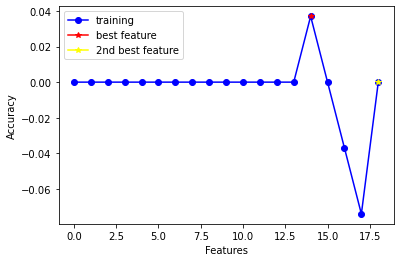

In [ ]:
model_hep = DT(3, cost_function=gini_index_cost)
hep_probs_test = model_hep.fit(x_hep_train, y_hep_train).predict(x_hep_test)
hep_y_pred = np.argmax(hep_probs_test, 1)
dt_hep_acc = np.sum(hep_y_pred == y_hep_test)/y_hep_test.shape[0]

# model_mes = DT(3, cost_function=gini_index_cost)
# mes_probs_test = model_mes.fit(x_mes_train, y_mes_train).predict(x_mes_test)
# mes_y_pred = np.argmax(mes_probs_test, 1)
# dt_mes_acc = np.sum(mes_y_pred == y_mes_test)/y_mes_test.shape[0]

features = [i for i in range(x_hep_train.shape[1])]
feature_accuracy = []
for col in range(x_hep_train.shape[1]):
  x_hep_train_perm = np.ndarray.copy(x_hep_train)
  x_hep_train_perm[:,col] = np.random.RandomState(seed=15).permutation(x_hep_train_perm[:,col])
  model = DT(max_depth=3, cost_function = gini_index_cost)
  y_hep_prob =  model.fit(x_hep_train_perm, y_hep_train).predict(x_hep_test)
  y_hep_pred = np.argmax(y_hep_prob, axis=-1)
  hep_acc = np.sum(y_hep_pred == y_hep_test)/y_hep_test.shape[0]
  feature_accuracy.append(dt_hep_acc - hep_acc) 

best_hep_features = np.argsort(feature_accuracy)[::-1][:2]
print(f'best features= {best_hep_features}, corresponding accuracies={feature_accuracy[best_hep_features[0]]} and {feature_accuracy[best_hep_features[1]]}')
plt.plot(features, feature_accuracy, marker='o', color='blue', label='training')
plt.plot(best_hep_features[0], feature_accuracy[best_hep_features[0]], marker='*', color='red', label='best feature')
plt.plot(best_hep_features[1], feature_accuracy[best_hep_features[1]], marker='*', color='yellow', label='2nd best feature')
plt.xlabel("Features")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.savefig('hep_DT_features_1.png',dpi=300,bbox_inches='tight')

^ obviously gives bad results, so i'll use the features from the random forest result.

[[0.         0.         1.        ]
 [0.         0.         1.        ]
 [0.         0.         1.        ]
 ...
 [0.         0.14285714 0.85714286]
 [0.         0.14285714 0.85714286]
 [0.         0.14285714 0.85714286]]


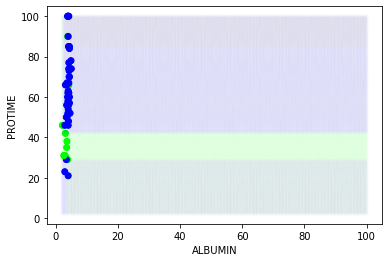

In [ ]:
x0v = np.linspace(np.min(x_hep_np[:,16]), np.max(x_hep_np[:,17]), 200)
x1v = np.linspace(np.min(x_hep_np[:,16]), np.max(x_hep_np[:,17]), 200)

model = DT(max_depth = 3, cost_function = gini_index_cost)  
x0, x1 = np.meshgrid(x0v, x1v)
x_all = np.vstack((x0.ravel(),x1.ravel())).T
y_hep_prob_all= model.fit(x_hep_train[:,[16,17]], y_hep_train).predict(np.squeeze(x_all))
y_hep_train_prob = np.zeros((y_hep_train.shape[0], np.max(y_hep_np)+1))
y_hep_train_prob[np.arange(y_hep_train.shape[0]), y_hep_train] = 1

print(y_hep_prob_all)

plt.scatter(x_hep_train[:,16], x_hep_train[:,17], c=y_hep_train_prob, marker='o', alpha=1)
plt.scatter(x_all[:,0], x_all[:,1], c=y_hep_prob_all, marker='.', alpha=.01)
plt.ylabel('PROTIME')
plt.xlabel('ALBUMIN')
plt.savefig('DT_decision_boundary.png',dpi=300,bbox_inches='tight')
plt.show()

using results from the trandom forest test for messidor


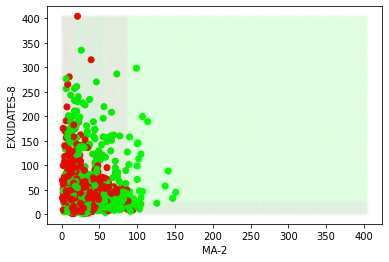

In [ ]:
x0v = np.linspace(np.min(x_mes_np[:,2]), np.max(x_mes_np[:,8]), 200)
x1v = np.linspace(np.min(x_mes_np[:,2]), np.max(x_mes_np[:,8]), 200)

model = DT(max_depth = 3, cost_function=gini_index_cost)
x0, x1 = np.meshgrid(x0v, x1v)
x_all = np.vstack((x0.ravel(),x1.ravel())).T
y_mes_prob_all = model.fit(x_mes_train[:,[2,8]], y_mes_train).predict(np.squeeze(x_all))
y_mes_train_prob = np.zeros((y_mes_train.shape[0], np.max(y_mes_np)+2))
y_mes_train_prob[np.arange(y_mes_train.shape[0]), y_mes_train] = 1

plt.scatter(x_mes_train[:,2], x_mes_train[:,8], c=y_mes_train_prob, marker='o', alpha=1)
plt.scatter(x_all[:,0], x_all[:,1], c=np.c_[y_mes_prob_all, np.zeros(np.shape(y_mes_prob_all)[0])], marker='.', alpha=.01)
plt.ylabel('EXUDATES-8')
plt.xlabel('MA-2')
plt.savefig('mes_decision_boundary.png',dpi=300,bbox_inches='tight')
plt.show()